In [1]:
'''
Read reviews from a JSON-formatted file into an array.
'''
import json
import string
import re
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score
# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

lines = [];
num_pos = 0;
num_neg = 0;
num_total = 75000;

with open('data/yelp_academic_dataset_review.json', 'r',encoding='utf8') as f:
    for line in f:
        if (len(lines) >= (num_total * 2)):
            break;

        json_info = json.loads(line);

        if json_info['stars'] > 3:
            if num_pos > num_total:
                continue;
            num_pos = num_pos + 1;
        elif json_info['stars'] < 3:
            if num_neg > num_total:
                continue;
            num_neg = num_neg + 1;
        else:
            continue;

        lines.append(json.loads(line));

'''
Separate line data into reviews and labels
'''
reviews = [line['text'] for line in lines];

stars = [line['stars'] for line in lines];
labels = ['1' if star > 3 else '0' for star in stars];

'''
Clean each document by removing unnecesary characters and splitting by space.
'''

Using TensorFlow backend.


'\nClean each document by removing unnecesary characters and splitting by space.\n'

In [2]:
print("ORIGINAL REVIEW:")
print(reviews[0])
print(stars[0])
print(labels[0])

ORIGINAL REVIEW:
The pizza was okay. Not the best I've had. I prefer Biaggio's on Flamingo / Fort Apache. The chef there can make a MUCH better NY style pizza. The pizzeria @ Cosmo was over priced for the quality and lack of personality in the food. Biaggio's is a much better pick if youre going for italian - family owned, home made recipes, people that actually CARE if you like their food. You dont get that at a pizzeria in a casino. I dont care what you say...
2
0


In [3]:
def clean_document1(doco):
    punctuation = string.punctuation + '\n\n';
    punc_replace = ''.join([' ' for s in punctuation]);
    doco_clean = doco.replace('-', ' ');
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace);
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')]);
    doco_clean = doco_clean.split(' ');
    doco_clean = [word.lower() for word in doco_clean if len(word) > 0];

    return doco_clean;


In [4]:
# Generate a cleaned reviews array from original review texts
review_cleans = [clean_document1(doc) for doc in reviews];
print("PUNCTUATION CLEANED:")
print(' '.join(review_cleans[0]))

PUNCTUATION CLEANED:
the pizza was okay not the best i ve had i prefer biaggio s on flamingo fort apache the chef there can make a much better ny style pizza the pizzeria cosmo was over priced for the quality and lack of personality in the food biaggio s is a much better pick if youre going for italian family owned home made recipes people that actually care if you like their food you dont get that at a pizzeria in a casino i dont care what you say


In [5]:
stopwords = {'a',
 'ain',
 'am',
 'an',
 'and',
 'any', 
 'as',
 'at',
 'be',
 'been',
 'being',
 'by',
 'd',
 'during',
 'each',
 'for',
 'from',
 'further',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'my',
 'myself',
 'now',
 'o',
 'of',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'she',
 "she's",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 've',
 'we',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}

def clean_document2(doco):
    ## Remove stop words
    doco = [w for w in doco if not w in stopwords]
    
    stemmer = SnowballStemmer('english')
    doco = [stemmer.stem(word) for word in doco]

    return doco

In [6]:
review_cleans2 = [clean_document2(doc) for doc in review_cleans];
review_cleans = review_cleans2
print("REMOVED STOPWORDS, APPLY STEMMING:")
print(' '.join(review_cleans[0]))

REMOVED STOPWORDS, APPLY STEMMING:
pizza was okay not best had prefer biaggio flamingo fort apach chef can make much better ny style pizza pizzeria cosmo was price qualiti lack person food biaggio is much better pick your go italian famili own home made recip peopl actual care like food dont get pizzeria casino dont care say


In [7]:
sentences = [' '.join(r) for r in review_cleans]

In [8]:
# Use a Keras Tokenizer and fit on the sentences
tokenizer = Tokenizer();
tokenizer.fit_on_texts(sentences);
reviews_encoded = np.array(tokenizer.texts_to_sequences(sentences));
print("ENCODED:")
print(' '.join(map(str,reviews_encoded[0])))

ENCODED:
127 1 479 4 71 7 927 14633 3444 4027 5454 531 28 48 84 92 1837 492 127 3526 4202 1 49 182 444 156 9 14633 3 84 92 265 5642 14 715 235 1191 153 85 2183 72 207 147 19 9 856 16 3526 849 856 147 69


In [9]:
sequence_dict = tokenizer.word_index;
# reverse - index to word
word_dict = dict((num, val) for (val, num) in sequence_dict.items());

HISTOGRAM OF LENGTH OF REVIEW


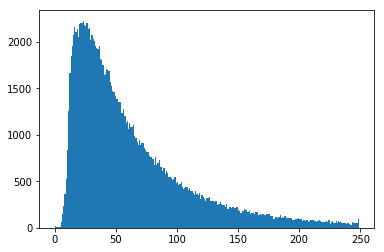

In [10]:
# Plot a Histogram of length of reviews
lengths = [len(x) for x in reviews_encoded];
plt.hist(lengths,range(0,250))
print("HISTOGRAM OF LENGTH OF REVIEW")
plt.show()

In [11]:
# Truncate and Pad reviews at a Maximum cap of 60 words.
max_cap = 60;
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')

In [12]:
print("PADDED SEQUENCE:")
# ' '.join(list(map(lambda x: word_dict[x] if x>0 else '0', X[0])))
print(' '.join(map(str,X[0])))

PADDED SEQUENCE:
0 0 0 0 0 0 0 0 127 1 479 4 71 7 927 14633 3444 4027 5454 531 28 48 84 92 1837 492 127 3526 4202 1 49 182 444 156 9 14633 3 84 92 265 5642 14 715 235 1191 153 85 2183 72 207 147 19 9 856 16 3526 849 856 147 69


In [13]:
# Obtain a One-hot Y array for each review label.
Y = np.array([[0,1] if '0' in label else [1,0] for label in labels])
print("Y-LABEL")
print(Y[0])

Y-LABEL
[0 1]


In [14]:
# Get a randomized sequence of positions to shuffle reviews
np.random.seed(1024);
random_posits = np.arange(len(X))
np.random.shuffle(random_posits);

# Shuffle X and Y
X = X[random_posits];
Y = Y[random_posits];

In [15]:
# Divide the reviews into Training, Dev, and Test data.
train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));
X_train, Y_train = X[:train_cap], Y[:train_cap];
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap];
X_test, Y_test = X[dev_cap:], Y[dev_cap:]
print("TRAIN COUNT: ",len(X_train))
print("VALIDATE COUNT: ",len(X_dev))
print("TEST COUNT: ",len(X_test))

TRAIN COUNT:  127500
VALIDATE COUNT:  11250
TEST COUNT:  11250


In [16]:
model = Sequential();
model.add(Embedding(len(word_dict)+1, max_cap, input_length=max_cap));
model.add(LSTM(100, return_sequences=True));
model.add(LSTM(100));
model.add(Dense(100, activation='relu'));
model.add(Dense(2, activation='softmax'));
print(model.summary());

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 60)            4367220   
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 100)           64400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 4,522,322
Trainable params: 4,522,322
Non-trainable params: 0
_________________________________________________________________
None


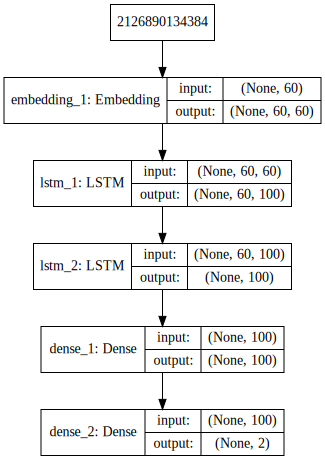

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [18]:
optimizer = Adam(lr=0.001, decay=0.0001);
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_dev, Y_dev))


Train on 127500 samples, validate on 11250 samples
Epoch 1/10
127500/127500 [==============================] - 230s 2ms/step - loss: 0.2241 - acc: 0.9102 - val_loss: 0.1852 - val_acc: 0.9281
Epoch 2/10
127500/127500 [==============================] - 221s 2ms/step - loss: 0.1410 - acc: 0.9454 - val_loss: 0.1749 - val_acc: 0.9364
Epoch 3/10
127500/127500 [==============================] - 219s 2ms/step - loss: 0.1030 - acc: 0.9613 - val_loss: 0.1741 - val_acc: 0.9371
Epoch 4/10
127500/127500 [==============================] - 212s 2ms/step - loss: 0.0740 - acc: 0.9735 - val_loss: 0.2328 - val_acc: 0.9337
Epoch 5/10
127500/127500 [==============================] - 216s 2ms/step - loss: 0.0528 - acc: 0.9817 - val_loss: 0.2264 - val_acc: 0.9327
Epoch 6/10
127500/127500 [==============================] - 224s 2ms/step - loss: 0.0366 - acc: 0.9874 - val_loss: 0.2666 - val_acc: 0.9305
Epoch 7/10
127500/127500 [==============================] - 231s 2ms/step - loss: 0.0272 - acc: 0.9914 - val_

In [27]:
# Obtain predictions
predictions = model.predict_classes(X_test)

# Convert Y_test to the same format as predictions
actuals = [0 if y[0] == 1 else 1 for y in Y_test];

# Use SkLearn's Metrics module
accuracy_score(predictions, actuals)

0.9279111111111111

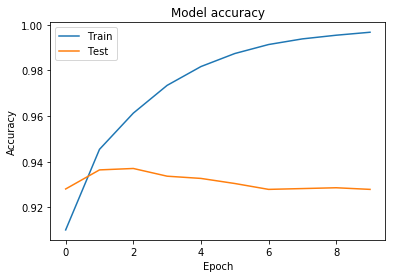

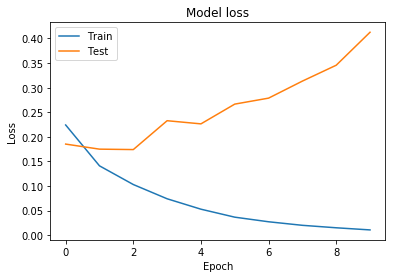

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()